El objetivo del método es ajustar dinámicamente los intervalos de predicción para cumplir con la cobertura deseada $ 1 - \alpha $. Esto se logra utilizando un esquema basado en un **controlador PID (Proporcional, Integral, Derivativo)**, que combina ajustes basados en el error reciente, acumulativo, y cambios futuros.

El controlador PID se describe por la ecuación:

$$
q_{t+1} = \eta g_t + r_t\left(\sum_{i=1}^t g_i\right) + g'_t,
$$

donde:
- $ q_{t+1} $: Cuantil ajustado en el tiempo $ t+1 $.
- $ g_t = \text{err}_t - \alpha $: Error de cobertura en el tiempo $ t $, definido como la diferencia entre el error actual $ \text{err}_t $ y el nivel de significancia $ \alpha $.
- $ \eta g_t $: Componente proporcional (P), ajusta $ q_{t+1} $ en función del error reciente.
- $ r_t\left(\sum_{i=1}^t g_i\right) $: Componente integral (I), corrige desviaciones acumulativas.
- $ g'_t $: Componente derivativa (D), anticipa cambios futuros.



### **1. Componente Proporcional ($ \text{P}_t $)**
La componente proporcional mide el error de cobertura en el tiempo $ t $:
$$
g_t = \text{err}_t - \alpha,
$$
donde:
- $ \text{err}_t = \mathbb{I}(q_t \geq s_t) $: Cobertura actual (1 si el cuantil cubre el error $ s_t $, 0 si no lo cubre).
- $ \alpha $: Nivel de significancia deseado.

La contribución proporcional al ajuste se calcula como:
$$
\Delta_{\text{P}} = \eta g_t,
$$
donde $ \eta > 0 $ es un factor de escala o tasa de aprendizaje.



### **2. Componente Integral ($ \text{I}_t $)**
El término integral acumula los errores pasados, corrigiendo desviaciones sistemáticas:
$$
\text{I}_t = r_t\left(\sum_{i=1}^t g_i\right),
$$
donde:
- $ \sum_{i=1}^t g_i $: Suma acumulativa de los errores pasados.
- $ r_t $: Función de integración no lineal, que en el código se define como:
  $$
  r_t\left(\sum_{i=1}^t g_i\right) = \tan\left(\frac{\sum_{i=1}^t g_i}{C \cdot t}\right),
  $$
  donde $ C $ es un parámetro de saturación que evita acumulaciones excesivas.



### **3. Componente Derivativo ($ \text{D}_t $)**
El término derivativo anticipa cambios futuros en los errores $ g_t $. En el paper, este término se describe como:
$$
g'_t = \hat{s}_{t+1},
$$
donde $ \hat{s}_{t+1} $ es una predicción del próximo error $ s_{t+1} $, obtenida mediante un modelo como **ThetaModel** en el código.



### **Ecuación Final**
La actualización del cuantil ajustado combina los tres términos:
$$
q_{t+1} = q_t + \eta g_t + r_t\left(\sum_{i=1}^t g_i\right) + g'_t.
$$



### **Interpretación**
- **Proporcional ($ \eta g_t $)**: Ajusta el intervalo basándose en el error reciente.
- **Integral ($ r_t(\sum g_i) $)**: Corrige desviaciones acumulativas de cobertura.
- **Derivativo ($ g'_t $)**: Introduce información futura para anticipar cambios en la serie.

### **Propiedad Clave**
El esquema PID garantiza que, a largo plazo, la cobertura observada $ \frac{1}{T} \sum_{t=1}^T \mathbb{I}(q_t \geq s_t) $ converge al nivel deseado $ 1 - \alpha $. Esto se expresa matemáticamente como:
$$
\lim_{T \to \infty} \frac{1}{T} \sum_{t=1}^T \text{err}_t \approx \alpha.
$$


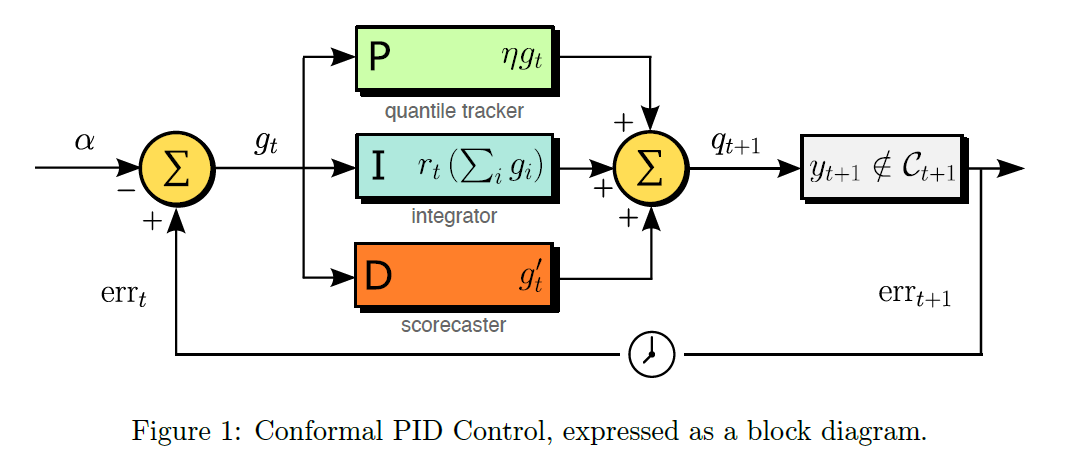